# Linear Regression Basic

## 4.1 Linear Regression

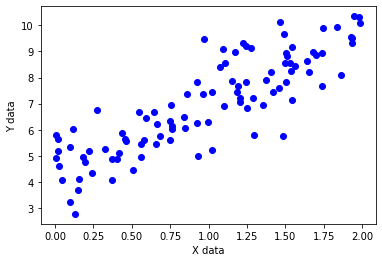

In [1]:
# generate linear data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'bo')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.show()


In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.34079023]
 [2.69451108]]


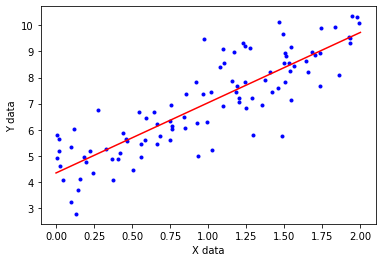

In [3]:
# prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

# plot
plt.plot(X, y, 'b.')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.plot(X_new, y_predict, "r-")
plt.show()

## 4.2 Gradient Descent

In [4]:
alpha = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iter in range(n_iterations):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * grad

print(theta)

[[4.34079023]
 [2.69451108]]


In [5]:
# stochastic gradient descent
n_epochs = 50
t1, t2 = 5, 50

def learning_schedule(t):
    return t1 / (t + t2)

theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        rand_idx = np.random.randint(m)
        sample_x = X_b[rand_idx: rand_idx+1]
        sample_y = y[rand_idx: rand_idx+1]
        grad = 2 * sample_x.T.dot(sample_x.dot(theta) - sample_y)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * grad
        
print(theta)

[[4.30230034]
 [2.68088653]]


In [6]:
# minibatch gradient descent
# we can optimize calculations using GPU here

## 4.3 Polynomial Regression

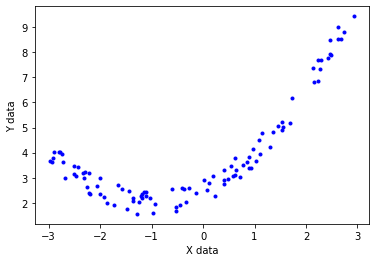

In [7]:
# simple quadratic data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

plt.plot(X, y, 'b.')
plt.xlabel("X data")
plt.ylabel("Y data")
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

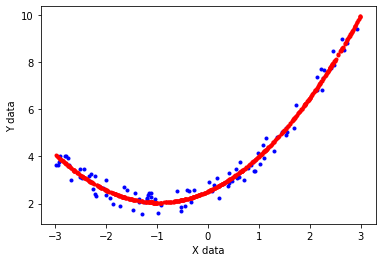

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new = np.random.uniform(low=-3, high=3, size=(600,1))
X_new_poly = poly_features.fit_transform(X_new)
y_new_pred = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.xlabel("X data")
plt.ylabel("Y data")
plt.plot(X_new, y_new_pred, 'r.')
plt.show()

## 4.4 Learning Curve

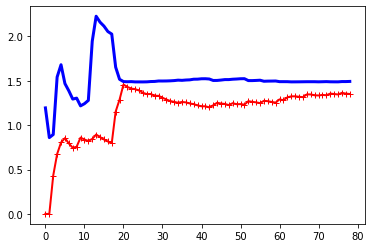

In [19]:
# plot learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label="val set")
    plt.show()
                        

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

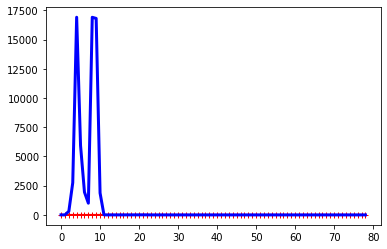

In [20]:
# polynomial feature learning curves pipeline
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

## 4.5 Restrictions

In [ ]:
# ridge lasso